In [100]:
#imports
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy import genfromtxt

## Concerns housing values in suburbs of Boston.

- Number of Instances: 506
- Number of Attributes: 13 continuous attributes (including "class"
- attribute "MEDV"), 1 binary-valued attribute.
- Attribute Information:
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
- Missing Attribute Values: None.

link - https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

## 1. Data import

In [101]:
#import data as well as header separately

boston_dataset= "C:/Users/Omordia/Desktop/housing-data.csv"

#import data without header
all_data = genfromtxt(boston_dataset, delimiter=',', skip_header=1)

all_data_with_header = np.genfromtxt(boston_dataset, delimiter=",", skip_header=0, dtype=None)
header_names = [name.decode('UTF-8') for name in all_data_with_header[0,:]][0:]

C:\Users\Omordia\AppData\Local\Temp\ipykernel_24252\361278644.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  all_data_with_header = np.genfromtxt(boston_dataset, delimiter=",", skip_header=0, dtype=None)


In [102]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston_dataset.keys()

C:\Users\Omordia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [103]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [104]:
print(header_names)

all_data.shape

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


(511, 14)

In [105]:
all_data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [4.4433e-01, 0.0000e+00, 1.2500e+01, ..., 3.4300e+02, 2.1000e+01,
        5.4000e+01],
       [7.7763e-01, 0.0000e+00, 1.2700e+01, ..., 3.4300e+02, 7.6000e+01,
        6.7000e+01],
       [6.5432e-01, 0.0000e+00, 1.2800e+01, ..., 3.2100e+02, 4.5000e+01,
        2.4000e+01]])

In [106]:
boston['MEDV'] = boston_dataset.target

In [107]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

C:\Users\Omordia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


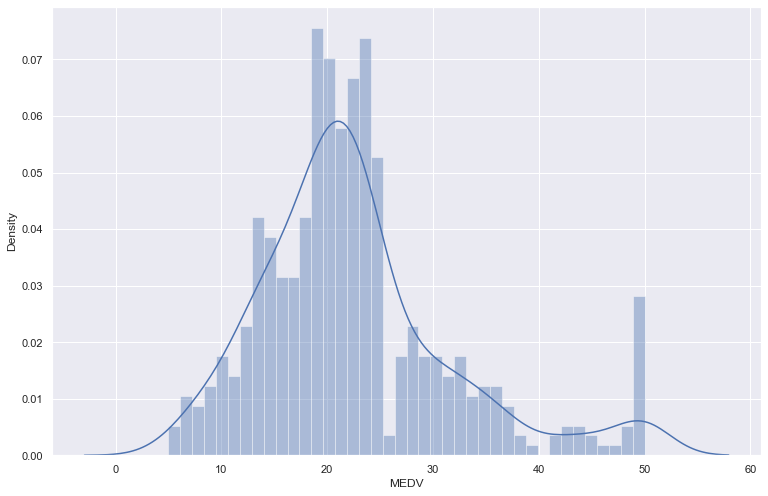

In [108]:
# set the size of the figure
sns.set(rc={'figure.figsize':(12.7,8.25)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=40)
plt.show()

# CORRELATION MATRIX

In [109]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(4)
     

<AxesSubplot:>

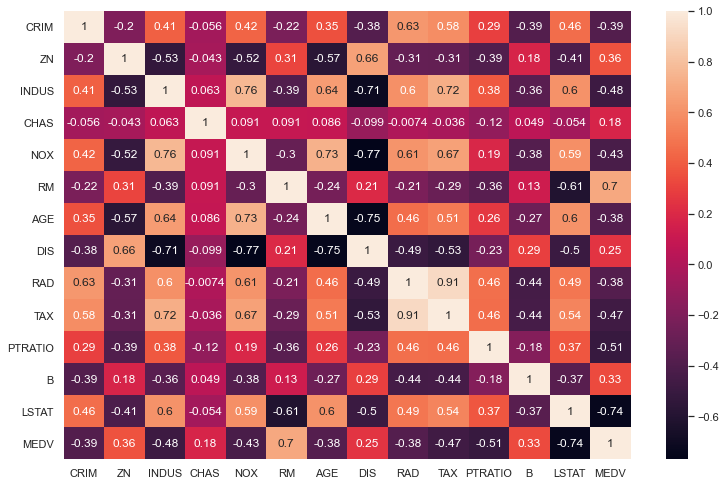

In [110]:
sns.heatmap(data=correlation_matrix, annot=True)

From the above plot, you can observaed the strong correlation betwwen MEDV, LSTAT AND RM. Also between RAD and TAX.

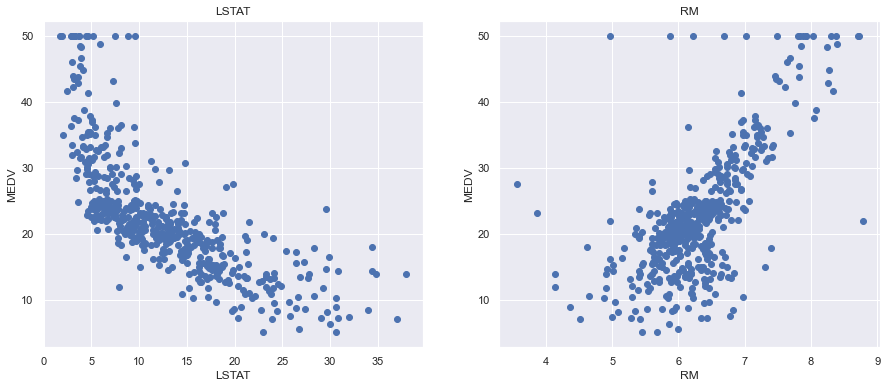

In [144]:
plt.figure(figsize=(15, 6))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
     

## 2. Preprocessing

In [112]:
#seprate data into features and labels.

label_col = all_data.shape[1]-1
X_train = all_data[:,0:label_col]
Y_train = all_data[:,label_col]
X_features = header_names[0:label_col]
X_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [113]:
#count the number of NAN in numpy array
print(X_train[10, :])
np.count_nonzero(np.isnan(X_train))

[2.2489e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01        nan
 9.4300e+01 6.3467e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9252e+02
 2.0450e+01]


5

In [114]:
#Replace NAN with 0 and infinity with very large number
X_train = np.nan_to_num(X_train)

In [115]:
X_train

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [4.4433e-01, 0.0000e+00, 1.2500e+01, ..., 2.3000e+01, 3.4300e+02,
        2.1000e+01],
       [7.7763e-01, 0.0000e+00, 1.2700e+01, ..., 2.3000e+01, 3.4300e+02,
        7.6000e+01],
       [6.5432e-01, 0.0000e+00, 1.2800e+01, ..., 2.3000e+01, 3.2100e+02,
        4.5000e+01]])

In [116]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [137]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#use Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [139]:
#View parameters
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [-0.71722954  4.58938833], b = 2.74


## 4. Predict

In [124]:
#make predictions
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")
y_pred = np.dot(X_train, w) + b  

Prediction on training set:
 [15.73918109 36.83151871 15.28595344 24.31085266]
prediction using w,b:
 33     15.739181
283    36.831519
418    15.285953
502    24.310853
dtype: float64
Target values 
 [24.  21.6 34.7 33.4]


In [132]:
from sklearn.metrics import mean_squared_error, r2_score

In [133]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701




In [140]:
y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
     

The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


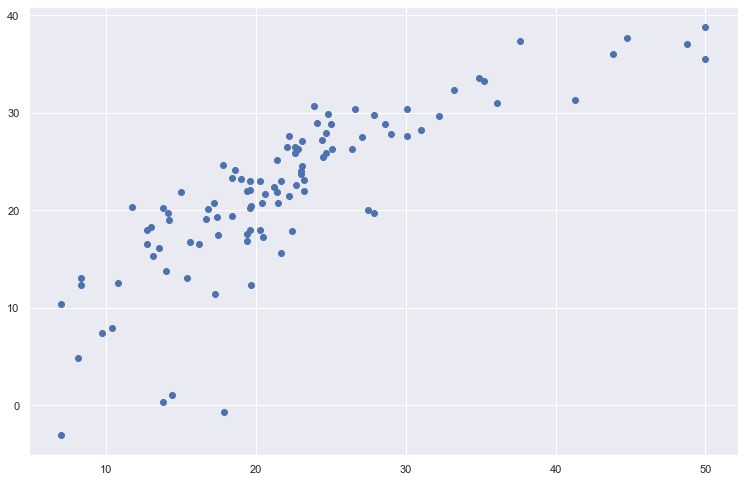

In [141]:
plt.scatter(Y_test, y_test_predict)
plt.show()

# The objective is to predict the value of prices of the house using the given features. The model is design for Boston 